## Initialization

In [1]:
import blackhc.notebook

Appended /home/adibi/rmg7/MIP/BatchBALD/src to paths
Switched to directory /home/adibi/rmg7/MIP/BatchBALD
%load_ext autoreload
%autoreload 2


In [2]:
import torch

In [3]:
import al_notebook.results_loader as rl
import al_notebook.plots as alp
from acquisition_functions import AcquisitionFunction
from acquisition_method import AcquisitionMethod
from dataset_enum import DatasetEnum

In [4]:
import numpy as np

In [5]:
import prettyprinter as pp

In [6]:
import matplotlib.pyplot as plt

In [7]:
%matplotlib inline

In [8]:
#MARKERS = ("X", "s", "o")
MARKERS = None

## Common functions


In [9]:
def acc_label_axes(metric):
    plt.xlabel('Acquired dataset size')
    plt.ylabel(metric)

## MNIST

In [11]:
stores = rl.load_experiment_results('mnist_roy')

In [12]:
stores.keys()

dict_keys(['mnist_roy/mnist_full_resnet_multi_scratch_multibald_58.py', 'mnist_roy/mnist_full_resnet_multi_scratch_random_58.py', 'mnist_roy/mnist_full_resnet_multi_scratch_random_9031.py'])

In [13]:
pp.pprint(rl.get_any(stores).args)

al_notebook.results_loader._args(
    experiment_description='RSNA MULTI:RESNET BN DROPOUT MULTI BALD (SCRATCH)',
    batch_size=32,
    scoring_batch_size=128,
    test_batch_size=128,
    validation_set_size=5000,
    early_stopping_patience=3,
    epochs=30,
    epoch_samples=5056,
    num_inference_samples=50,
    available_sample_k=10,
    target_num_acquired_samples=250,
    target_accuracy=0.9,
    quickquick=False,
    seed=58,
    log_interval=20,
    initial_samples_per_class=10,
    initial_samples=None,
    min_remaining_percentage=100,
    min_candidates_per_acquired_item=1,
    initial_percentage=100,
    reduce_percentage=0,
    balanced_validation_set=True,
    balanced_test_set=False,
    no_cuda=False,
    experiment_task_id='mnist_full_resnet_multi_scratch_multibald_58',
    experiments_laaos='./experiment_configs/MNIST/scratch_multi_config.py',
    type=acquisition_functions.AcquisitionFunction.bald,
    acquisition_method=acquisition_method.AcquisitionMethod.multib

In [14]:
pp.pprint(rl.diff_args(stores))

{
    'type': {
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.bald
    },
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.multibald,
        acquisition_method.AcquisitionMethod.independent
    },
    'num_acquired_points': {170, 190, 150}
}


# Roy Methods

In [15]:
# vgg_multi_pretrained_9031.py
stores.keys()

dict_keys(['mnist_roy/mnist_full_resnet_multi_scratch_multibald_58.py', 'mnist_roy/mnist_full_resnet_multi_scratch_random_58.py', 'mnist_roy/mnist_full_resnet_multi_scratch_random_9031.py'])

{
    'type': {
        acquisition_functions.AcquisitionFunction.random,
        acquisition_functions.AcquisitionFunction.bald
    },
    'acquisition_method': {
        acquisition_method.AcquisitionMethod.multibald,
        acquisition_method.AcquisitionMethod.independent
    },
    'num_acquired_points': {170, 190, 150}
}
{
    'BatchBALD': {
        'num_trials': 1,
        'experiment_description': {
            'RSNA MULTI:RESNET BN DROPOUT MULTI BALD (SCRATCH)'
        },
        'num_inference_samples': {50},
        'available_sample_k': {10},
        'quickquick': {False},
        'initial_samples_per_class': {10},
        'initial_samples': {None},
        'min_remaining_percentage': {100},
        'min_candidates_per_acquired_item': {1},
        'initial_percentage': {100},
        'reduce_percentage': {0},
        'balanced_validation_set': {True},
        'balanced_test_set': {False},
        'experiments_laaos': {
            './experiment_configs/MNIST/scratch_multi_c

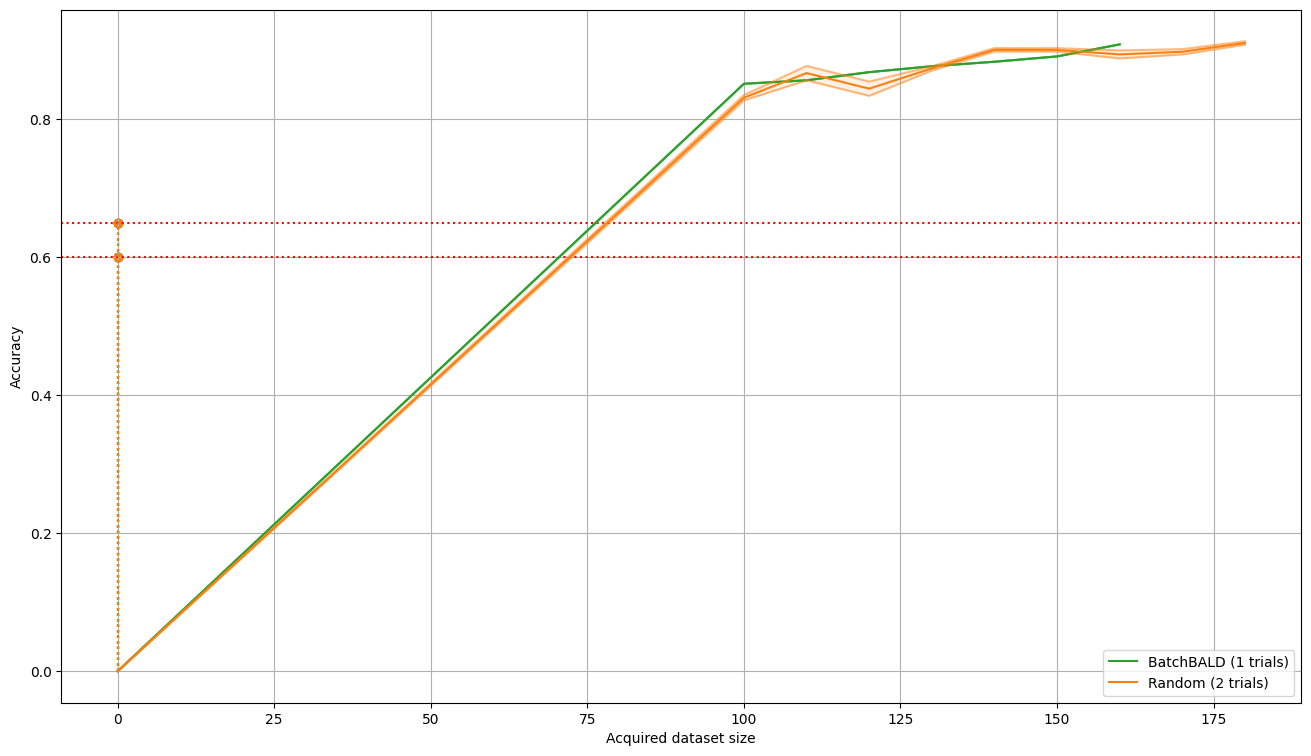

BatchBALD (1 trials):
60% at [0 0 0]
65% at [0 0 0]
Random (2 trials):
60% at [0 0 0]
65% at [0 0 0]


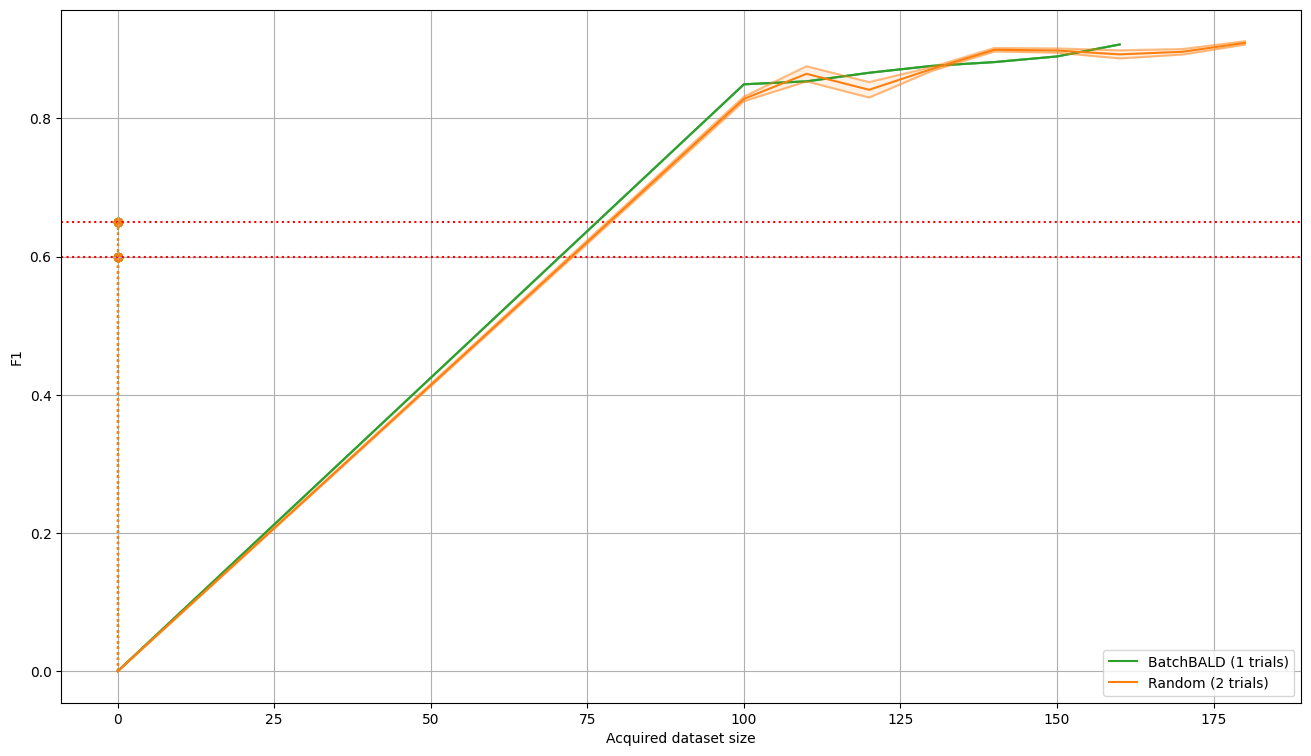

BatchBALD (1 trials):
60% at [0 0 0]
65% at [0 0 0]
Random (2 trials):
60% at [0 0 0]
65% at [0 0 0]


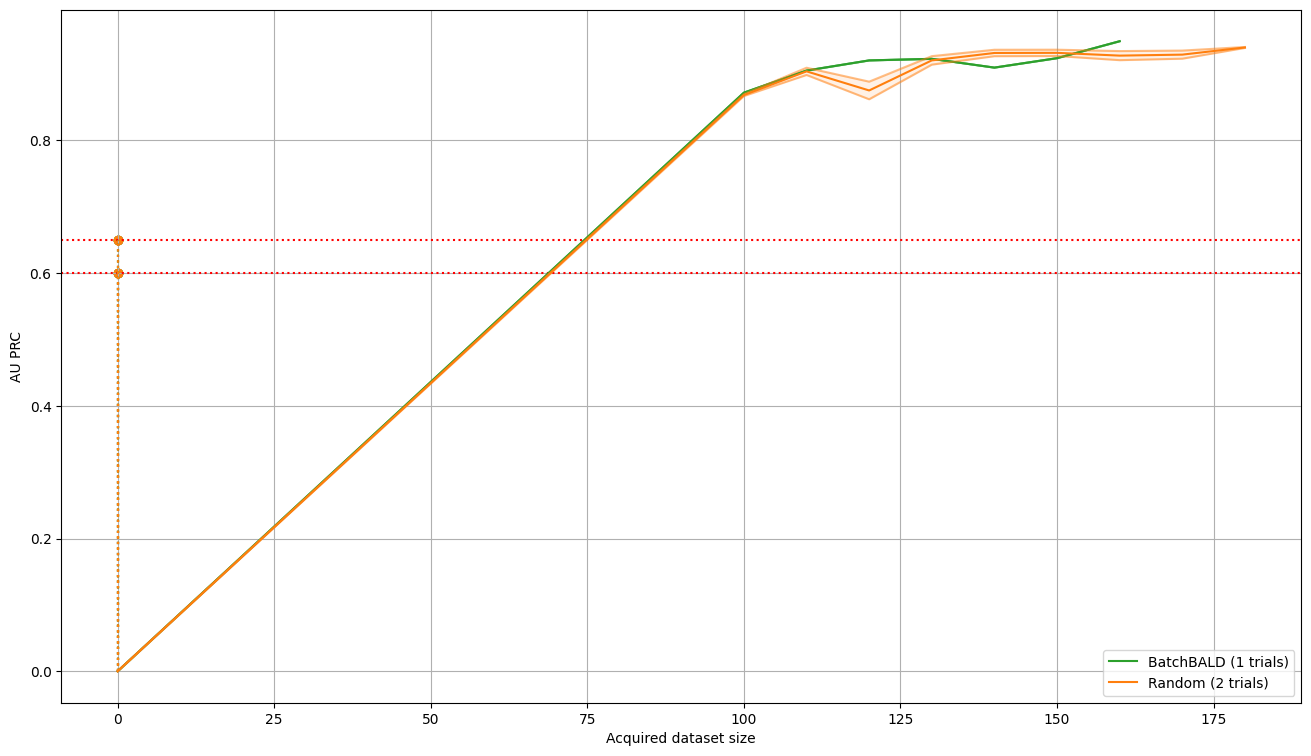

BatchBALD:
60% at [0 0 0]
65% at [0 0 0]
Random:
60% at [0 0 0]
65% at [0 0 0]


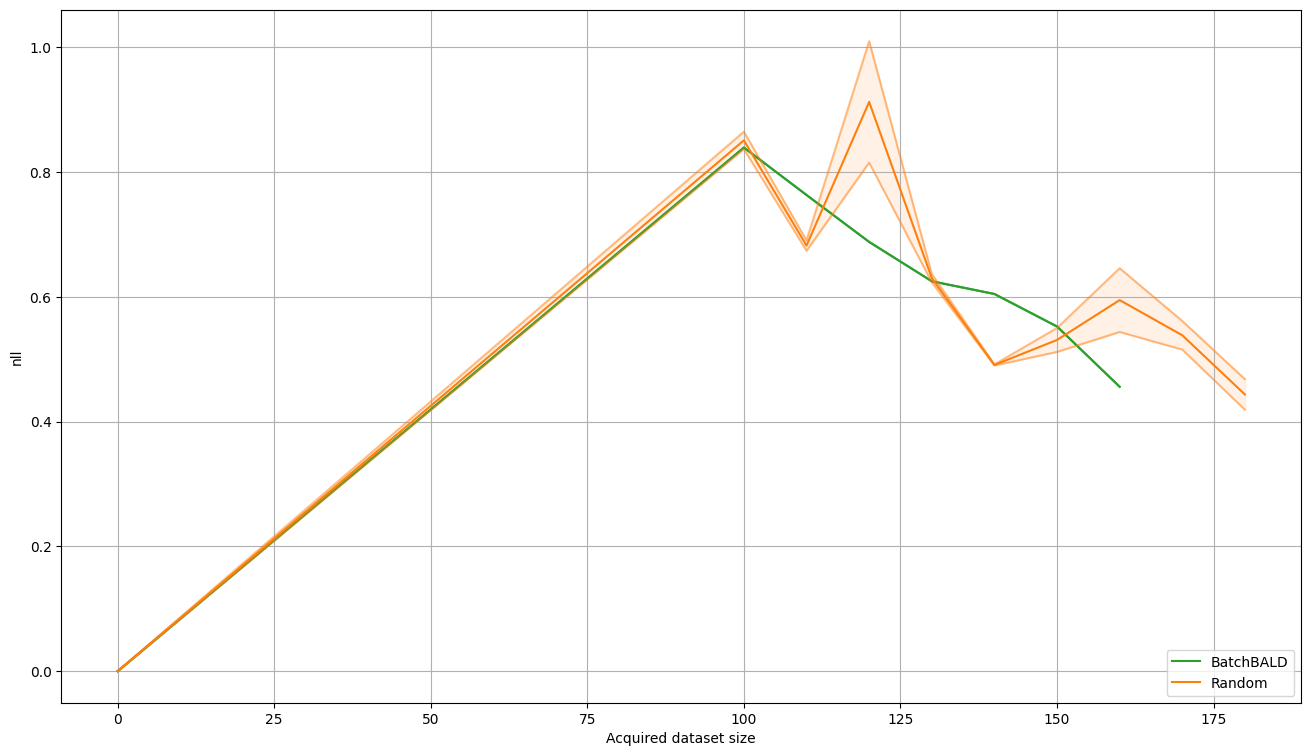

In [17]:
for show_b in (10, ):
    filtered = {}

    def filter_exps(name, store):

        vip_args = rl.get_vip_args(store)

        # if vip_args.ds not in (DatasetEnum.rsna_multi,
        #                        ):  #, DatasetEnum.mnist_w_noise):
        #     return False

        if vip_args.nis == 0:
            return False

    #     if vip_args.nap < 300:
    #         return False

        if (vip_args.am, vip_args.af) in ((AcquisitionMethod.multibald,
                                               AcquisitionFunction.bald),
                                              (AcquisitionMethod.independent,
                                               AcquisitionFunction.bald),
                                              (AcquisitionMethod.independent, 
                                               AcquisitionFunction.random),
                                              (AcquisitionMethod.independent, 
                                               AcquisitionFunction.mean_stddev),
                                              (AcquisitionMethod.independent, 
                                               AcquisitionFunction.variation_ratios)):
            return True

        if vip_args.af != AcquisitionFunction.random:
            if vip_args.k not in (10, ):
                return False

            if vip_args.b not in (show_b, ):
                return False
        return True

    filtered.update(rl.filter_dict(stores, kv=filter_exps))

    pp.pprint(rl.diff_args(filtered))

    def key2text(name, store):

        vip_args = rl.get_vip_args(store)
        am, af = vip_args.am, vip_args.af
        if (am, af) == (AcquisitionMethod.independent,
                        AcquisitionFunction.random):
            return 'Random'
        elif (am, af) == (AcquisitionMethod.independent,
                          AcquisitionFunction.bald):
            return f'BALD'
        elif (am, af) == (AcquisitionMethod.independent,
                          AcquisitionFunction.variation_ratios):
            return f'Var ratios'
        elif (am, af) == (AcquisitionMethod.independent,
                          AcquisitionFunction.mean_stddev):
            return f'Mean STD'
        elif (am, af) == (AcquisitionMethod.multibald,
                          AcquisitionFunction.bald):
            return f'BatchBALD'
        raise ValueError(vip_args)

    #grouped_by = rl.groupby_dict(filtered, key_kv=rl.get_diff_args_key2text(filtered, ('tag',)))
    grouped_by = rl.groupby_dict(filtered, key_kv=key2text)

    pp.pprint(
        rl.map_dict(grouped_by, v=lambda stores: rl.get_stores_info(stores)))

    # TODO: add rl.aggregate_f1 and other methods
    grouped_by_accuracy = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_accuracies(stores, thresholds=(60, 65)))
    grouped_by_f1 = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_f1(stores, thresholds=(60, 65)))
    grouped_by_auprc = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_auprc(stores, thresholds=(60, 65)))
    grouped_by_loss = rl.map_dict(
        grouped_by,
        v=lambda stores: rl.aggregate_loss(stores, thresholds=(60, 65)))

    #sorted_dict = rl.sort_dict(grouped_by, v=rl.get_threshold_quantiles_key)

    acquisition_functions_list = ['BatchBALD', 'Random', 'BALD', 'Var ratios', 'Mean STD']
    acquisition_functions_list = ['BatchBALD', 'Random']

    sorted_dict_accuracy = {
        key: grouped_by_accuracy[key]
        # for key in ['BatchBALD', 'Random', 'BALD', 'Var ratios', 'Mean STD']
        for key in acquisition_functions_list
    }

    sorted_dict_f1= {
        key: grouped_by_f1[key]
        # for key in ['BatchBALD', 'Random', 'BALD', 'Var ratios', 'Mean STD']
        for key in acquisition_functions_list
    }

    sorted_dict_auprc = {
        key: grouped_by_auprc[key]
        # for key in ['BatchBALD', 'Random', 'BALD', 'Var ratios', 'Mean STD']
        for key in acquisition_functions_list
    }

    sorted_dict_loss = {
        key: grouped_by_loss[key]
        # for key in ['BatchBALD', 'Random', 'BALD', 'Var ratios', 'Mean STD']
        for key in acquisition_functions_list
    }

    figsize = (16, 9)

    ##### ACCURACY #####
    metric = 'accuracy'
    plt.figure(figsize=figsize)
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict_accuracy,
                               show_num_trials=True,
                               show_quantiles=True,
                               show_thresholds=True)
    # plt.axis([25, 2500, 0.55, 0.70])
    acc_label_axes(metric=metric.capitalize())
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

    ##### F1 #####
    metric = 'f1'
    plt.figure(figsize=figsize)
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict_f1,
                               show_num_trials=True,
                               show_quantiles=True,
                               show_thresholds=True)
    # plt.axis([25, 2500, 0.55, 0.70])
    acc_label_axes(metric=metric.capitalize())
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

    ##### AU PRC #####
    metric = 'AU_PRC'
    plt.figure(figsize=figsize)
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict_auprc,
                               show_num_trials=True,
                               show_quantiles=True,
                               show_thresholds=True)
    # plt.axis([25, 2500, 0.55, 0.75])
    acc_label_axes(metric='AU PRC')
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()

    ##### LOSS #####
    metric = 'nll'
    plt.figure(figsize=figsize)
    #plt.title("RMNIST")
    alp.plot_aggregated_groups(sorted_dict_loss,
                               show_num_trials=False,
                               show_quantiles=False,
                               show_thresholds=False)
    # plt.axis([25, 2500, 0.7, 1.82])
    acc_label_axes(metric=metric)
    plt.grid(True)
    plt.legend(loc='lower right')

    output_path = blackhc.notebook.original_dir + f'/RSNA_multi_{metric}.png'
    alp.plot_save(output_path, dpi=300)
    plt.show()